# Objective of the project

The objective of this project is indicated in the challenge website:  
"Egis contribue à l’exploitation du contrôle du stationnement sur voirie pour plusieurs villes, en France et à l’international.
Des véhicules équipés de caméras prennent des photos des véhicules stationnés.
Puis, à partir du numéro de la plaque, de la géolocalisation et de l’horodatage, un processus est initié pour contrôler la validité du stationnement et aller jusqu’à l’émission d’un forfait post stationnement si nécessaire. 
Nous sommes convaincus que l’analyse de ces données permettrait d’optimiser l’activité d’exploitation d’une part et permettrait de réduire le taux d’infraction constaté.
Nous suggérons donc de mettre au point un modèle de Machine Learning dans le but d’Identifier les zones / horaires où il y a le plus d’infractions et optimiser les trajets des véhicules de contrôle du stationnement en conséquence."

(Description inserted from Kaggle : https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [17]:
# Split datasets into features (X) and target (y)
X_train = pd.read_csv('x_train_final_asAbTs5.csv', sep=',', header=0, encoding='utf-8', index_col=0) # (4861236, 11)
y_train = pd.read_csv('y_train_final_YYyFil7.csv', sep=',', header=0, encoding='utf-8', index_col=0) # (2028750, 11)
X_test = pd.read_csv('x_test_final_fIrnA7Q.csv', sep=',', header=0, encoding='utf-8', index_col=0) # (4861236, 2)

# Explanatory Data Analysis (EDA)

In [ ]:
# Dimensions of multiple datasets
print("X_train shape:", X_train.shape) # (6076546, 10)
print("y_train shape:", y_train.shape) # (6076546, 10)
print("X_test shape:", X_test.shape)   # (2028750, 10)

X_train shape: (6076546, 10)
y_train shape: (6076546, 1)
X_test shape: (2028750, 10)


In [100]:
# Preview of the datasets
print("X_train preview:\n", X_train.head()) # Preview of the first 5 rows of X_train

X_train preview:
    total_count  longitude_scaled  latitude_scaled  Precipitations  \
0            1          0.998417         0.996118             0.0   
1           35          0.999222         0.996000             0.0   
2            3          0.998371         0.996309             1.8   
3            1          0.998804         0.996343             0.0   
4            2          0.999126         0.996417             0.0   

   HauteurNeige  Temperature  ForceVent  day_of_week  month_of_year  hour  
0           0.0         14.6        2.5            3              4     8  
1           0.0         22.4        3.1            5              3    13  
2           0.0         11.7        3.3            4             10     8  
3           0.0         28.6        2.6            4              2    16  
4           0.0          9.6        3.2            3              9    18  


In [101]:
X_train.info()
X_test.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6076546 entries, 0 to 6076545
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   total_count       int64  
 1   longitude_scaled  float64
 2   latitude_scaled   float64
 3   Precipitations    float64
 4   HauteurNeige      float64
 5   Temperature       float64
 6   ForceVent         float64
 7   day_of_week       int64  
 8   month_of_year     int64  
 9   hour              int64  
dtypes: float64(6), int64(4)
memory usage: 510.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028750 entries, 0 to 2028749
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   total_count       int64  
 1   longitude_scaled  float64
 2   latitude_scaled   float64
 3   Precipitations    float64
 4   HauteurNeige      float64
 5   Temperature       float64
 6   ForceVent         float64
 7   day_of_week       int64  
 8   month_of_year     int64  
 9   hour

# Handling of Na values

In the X Train data, there are Na values to handle in the "HauteurNeige" and "ForceVent" variables.  
In the Y test data, there are Na values in the HauteurNeige variables.  

In [102]:
print("X train data\n", X_train.isnull().sum()) # Check for missing values in X_train. HauteurNeige contains 1314641 missing values while ForceVent contains 4888 missing values.
print("X test data\n", X_test.isnull().sum()) # Check for missing values in X_test. HauteurNeige contains 7906 missing values.
print("Y train data\n", y_train.isnull().sum())


X train data
 total_count              0
longitude_scaled         0
latitude_scaled          0
Precipitations           0
HauteurNeige        164016
Temperature              0
ForceVent             6082
day_of_week              0
month_of_year            0
hour                     0
dtype: int64
X test data
 total_count            0
longitude_scaled       0
latitude_scaled        0
Precipitations         0
HauteurNeige        7906
Temperature            0
ForceVent              0
day_of_week            0
month_of_year          0
hour                   0
dtype: int64
Y train data
 invalid_ratio    0
dtype: int64


In [103]:
X_train.loc[X_train["HauteurNeige"].isna()]

,total_count,longitude_scaled,latitude_scaled,Precipitations,HauteurNeige,Temperature,ForceVent,day_of_week,month_of_year,hour
30,3,0.998991,0.996736,0.0,NaN,21.5,2.9,6,12,13
85,2,0.998928,0.996356,0.0,NaN,19.0,4.1,3,12,13
108,5,0.998715,0.996637,0.0,NaN,19.6,2.8,4,12,12
112,19,0.999361,0.996249,0.0,NaN,9.3,3.8,2,9,11
179,6,0.999043,0.995702,0.0,NaN,10.6,5.0,4,7,18
...,...,...,...,...,...,...,...,...,...,...
6076319,4,0.999011,0.996489,0.0,NaN,23.8,4.4,2,12,14
6076425,21,0.999345,0.996850,0.0,NaN,21.3,2.3,5,12,14
6076434,5,0.999119,0.996621,0.0,NaN,19.1,1.6,5,12,11
6076453,14,0.998711,0.995967,0.0,NaN,14.4,2.0,4,12,7


We observe that a majority of HauteurNeige has NA values for a Temperature > 5 Celsius degrees.  
We can assume that snow only appear when temperature is lower than 5 Celsius degrees. 

In [18]:
X_train.loc[X_train["Temperature"] > 5 & X_train["HauteurNeige"].isna(), "HauteurNeige"] = 0
X_train.loc[X_train["HauteurNeige"].isna()] = 1.0

X_test.loc[X_test["Temperature"] > 5 & X_test["HauteurNeige"].isna(), "HauteurNeige"] = 0
X_test.loc[X_test["HauteurNeige"].isna()] = 1.0

For the "ForceVent" variables, most of the Na values are located on December, the 1st day of the week, between hour 8, 9, and 10.
Moreover, we also observe that Temperature is either 15.1, 16.0, or 16.6

In [105]:
X_train.loc[X_train["ForceVent"].isna()]

,total_count,longitude_scaled,latitude_scaled,Precipitations,HauteurNeige,Temperature,ForceVent,day_of_week,month_of_year,hour
1058,2,0.999024,0.995986,0.0,0.0,15.1,NaN,1,12,8
1144,2,0.998430,0.996289,0.0,0.0,16.0,NaN,1,12,9
1214,22,0.998835,0.996188,0.0,0.0,16.6,NaN,1,12,10
1544,3,0.999111,0.996349,0.0,0.0,16.6,NaN,1,12,10
2507,28,0.998921,0.996068,0.0,0.0,16.0,NaN,1,12,9
...,...,...,...,...,...,...,...,...,...,...
6069634,8,0.998455,0.996288,0.0,0.0,15.1,NaN,1,12,8
6071802,1,0.998417,0.996173,0.0,0.0,15.1,NaN,1,12,8
6072763,20,0.999037,0.995825,0.0,0.0,16.0,NaN,1,12,9
6075810,1,0.999253,0.996379,0.0,0.0,16.6,NaN,1,12,10


In [106]:
X_train.loc[
    (X_train["day_of_week"] == 1) & 
    (X_train["month_of_year"] == 12) &
    (X_train["ForceVent"].isna()) 
    ].sort_values(["Temperature"])

,total_count,longitude_scaled,latitude_scaled,Precipitations,HauteurNeige,Temperature,ForceVent,day_of_week,month_of_year,hour
1058,2,0.999024,0.995986,0.0,0.0,15.1,NaN,1,12,8
3107412,5,0.998319,0.996193,0.0,0.0,15.1,NaN,1,12,8
3108319,2,0.998540,0.995919,0.0,0.0,15.1,NaN,1,12,8
3120887,12,0.999173,0.996231,0.0,0.0,15.1,NaN,1,12,8
3120994,12,0.998399,0.996196,0.0,0.0,15.1,NaN,1,12,8
...,...,...,...,...,...,...,...,...,...,...
3664511,12,0.998707,0.995829,0.0,0.0,16.6,NaN,1,12,10
3667363,2,0.998648,0.996117,0.0,0.0,16.6,NaN,1,12,10
3668244,6,0.998741,0.995809,0.0,0.0,16.6,NaN,1,12,10
3648667,3,0.998911,0.996591,0.0,0.0,16.6,NaN,1,12,10


In [107]:
X_train.loc[
    (X_train["day_of_week"] == 1) & 
    (X_train["month_of_year"] == 12) &
    ((X_train["hour"] == 7) | (X_train["hour"] == 11)) 
    ].sort_values(["Temperature"])

,total_count,longitude_scaled,latitude_scaled,Precipitations,HauteurNeige,Temperature,ForceVent,day_of_week,month_of_year,hour
4132230,16,0.998508,0.996081,0.0,0.0,13.3,3.1,1,12,7
4354420,1,0.998820,0.995677,0.0,0.0,13.3,3.1,1,12,7
1006809,13,0.998641,0.995937,0.0,0.0,13.3,3.1,1,12,7
4348875,3,0.998377,0.996299,0.0,0.0,13.3,3.1,1,12,7
4346685,1,0.998929,0.995819,0.0,0.0,13.3,3.1,1,12,7
...,...,...,...,...,...,...,...,...,...,...
2491632,6,0.999327,0.996733,0.0,0.0,26.8,2.2,1,12,11
4940602,1,0.999093,0.996648,0.0,0.0,26.8,2.2,1,12,11
669161,7,0.998635,0.996108,0.0,0.0,26.8,2.2,1,12,11
4946185,10,0.998789,0.996059,0.0,0.0,26.8,2.2,1,12,11


## Elbow Method

Before replacing Na values, it can be interesting to see how our datasets are represented geographically.  
In doing this, we will be able to have a mapping, where we can then apply our data.

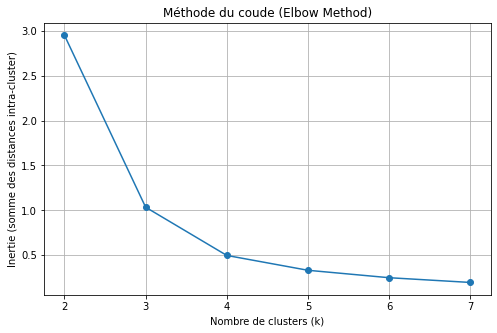

In [108]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = X_train[["latitude_scaled", "longitude_scaled"]]
inertias = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Tracer la courbe
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Méthode du coude (Elbow Method)")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (somme des distances intra-cluster)")
plt.grid(True)
plt.show()


In [19]:
from sklearn.cluster import KMeans

number_cluster = 4

X_tr = X_train[["latitude_scaled", "longitude_scaled"]]
kmeans = KMeans(n_clusters=number_cluster)
X_train["geo_cluster"] = kmeans.fit_predict(X_tr)

X = X_test[["latitude_scaled", "longitude_scaled"]]
kmeans = KMeans(n_clusters=number_cluster)
X_test["geo_cluster"] = kmeans.fit_predict(X)


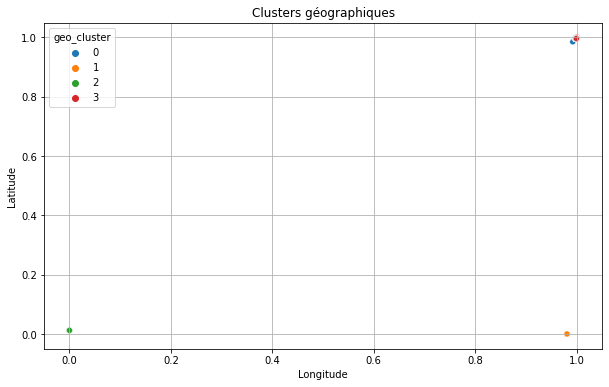

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x="longitude_scaled", y="latitude_scaled", hue="geo_cluster", palette="tab10")
plt.title("Clusters géographiques")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [111]:
X_train.loc[
    (X_train["day_of_week"] == 1) & 
    (X_train["month_of_year"] == 12) &
    (X_train["ForceVent"].isna()) #&
    # ~(X_train["geo_cluster"].isin([0, 3]))  
    ].sort_values(["Temperature"])

,total_count,longitude_scaled,latitude_scaled,Precipitations,HauteurNeige,Temperature,ForceVent,day_of_week,month_of_year,hour,geo_cluster
1058,2,0.999024,0.995986,0.0,0.0,15.1,NaN,1,12,8,0
3107412,5,0.998319,0.996193,0.0,0.0,15.1,NaN,1,12,8,0
3108319,2,0.998540,0.995919,0.0,0.0,15.1,NaN,1,12,8,0
3120887,12,0.999173,0.996231,0.0,0.0,15.1,NaN,1,12,8,3
3120994,12,0.998399,0.996196,0.0,0.0,15.1,NaN,1,12,8,0
...,...,...,...,...,...,...,...,...,...,...,...
3664511,12,0.998707,0.995829,0.0,0.0,16.6,NaN,1,12,10,0
3667363,2,0.998648,0.996117,0.0,0.0,16.6,NaN,1,12,10,0
3668244,6,0.998741,0.995809,0.0,0.0,16.6,NaN,1,12,10,0
3648667,3,0.998911,0.996591,0.0,0.0,16.6,NaN,1,12,10,3


In [114]:
X_train.loc[
    (X_train["day_of_week"] == 1) & 
    (X_train["month_of_year"] == 12) &
    ((X_train["hour"] >= 6) & (X_train["hour"] <= 11)) 
    ].sort_values(["Temperature"])

,total_count,longitude_scaled,latitude_scaled,Precipitations,HauteurNeige,Temperature,ForceVent,day_of_week,month_of_year,hour,geo_cluster
4175261,18,0.998928,0.995828,0.0,0.0,13.3,3.1,1,12,7,0
1005250,12,0.998486,0.995835,0.0,0.0,13.3,3.1,1,12,7,0
2285648,2,0.998468,0.996296,0.0,0.0,13.3,3.1,1,12,7,0
4301240,7,0.998477,0.995938,0.0,0.0,13.3,3.1,1,12,7,0
5189925,22,0.999126,0.996518,0.0,0.0,13.3,3.1,1,12,7,3
...,...,...,...,...,...,...,...,...,...,...,...
4893195,1,0.998699,0.995829,0.0,0.0,26.8,2.2,1,12,11,0
938023,5,0.998322,0.996178,0.0,0.0,26.8,2.2,1,12,11,0
5834795,1,0.998611,0.995903,0.0,0.0,26.8,2.2,1,12,11,0
3371793,7,0.999152,0.996123,0.0,0.0,26.8,2.2,1,12,11,3


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

# Créer un sous-ensemble de données sans NA pour entraîner le modèle
train_data = X_train.loc[
    (X_train["day_of_week"] == 1) & 
    (X_train["month_of_year"] == 12)
    ].dropna(subset=["ForceVent"])

# Sélectionner les features et la cible
X_reg = train_data[["Temperature", "hour", "geo_cluster"]]  # Ajouter d'autres variables pertinentes
y_reg = train_data["ForceVent"]

# Entraîner un modèle de régression
model = LinearRegression()
model.fit(X_reg, y_reg, sample_weight=train_data["total_count"])
scores = cross_val_score(model, X_reg, y_reg, scoring="neg_mean_squared_error", cv=5).mean()

print("MSE moyen (CV):", -scores.mean())
print("Min:", y_reg.min())
print("Max:", y_reg.max())
print("Mean:", y_reg.mean())


MSE moyen (CV): 0.7148202145524758
Min: 1.6
Max: 6.6
Mean: 2.9446039856923862


In [21]:
restricted_data = X_train.loc[
    (X_train["day_of_week"] == 1) & 
    (X_train["month_of_year"] == 12) &
    X_train["hour"].between(7, 11)
    ].dropna(subset=["ForceVent"])

X_rest = restricted_data[["Temperature", "hour", "geo_cluster"]]
y_rest = restricted_data["ForceVent"]

model_rest = LinearRegression()
model_rest.fit(X_rest, y_rest, sample_weight=restricted_data["total_count"])
score_rest = cross_val_score(model_rest, X_rest, y_rest, scoring="neg_mean_squared_error", cv=5).mean()

print("MSE:", -score_rest)
print("Min:", y_rest.min())
print("Max:", y_rest.max())
print("Mean:", y_rest.mean())


MSE: 0.41253612445536375
Min: 1.6
Max: 4.2
Mean: 2.4338929726551015


In [22]:
# Prédire les valeurs manquantes
X_missing = X_train[X_train["ForceVent"].isna()][["Temperature", "hour", "geo_cluster"]]  # Variables explicatives pour les NA
X_train.loc[X_train["ForceVent"].isna(), "ForceVent"] = model_rest.predict(X_missing)


## Correlation Matrix

Text(0.5, 1.0, 'Matrice de corrélation')

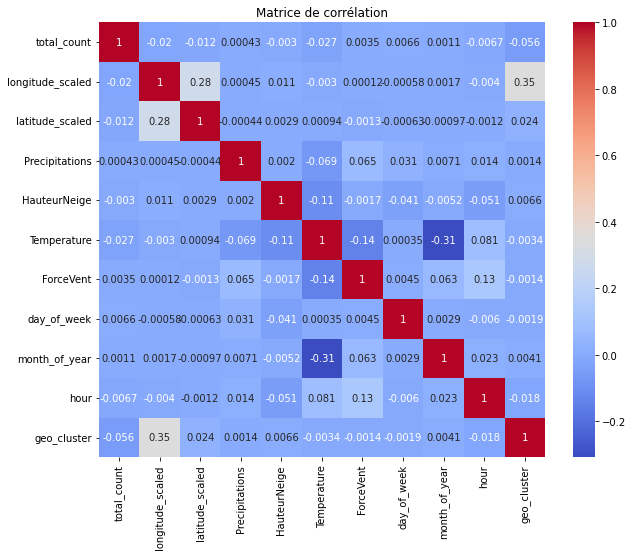

In [145]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")


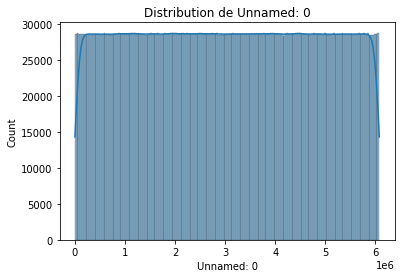

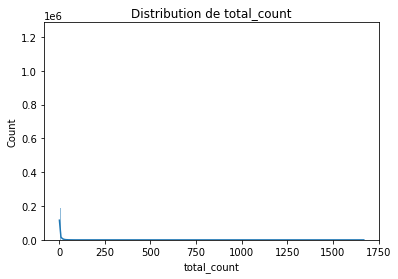

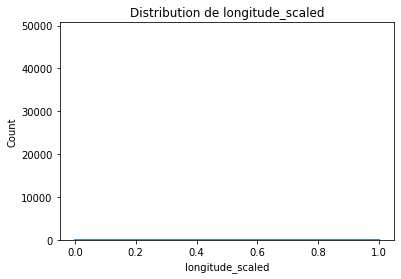

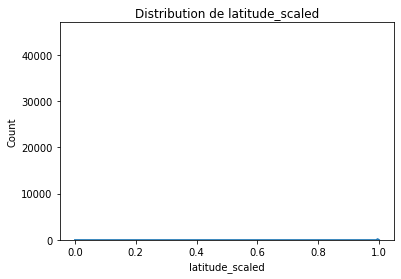

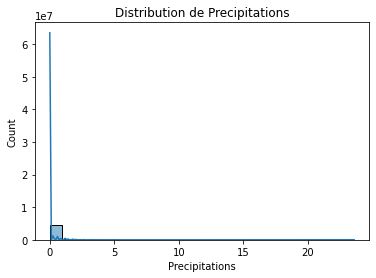

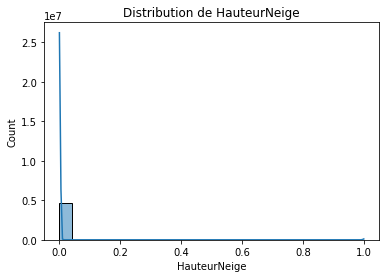

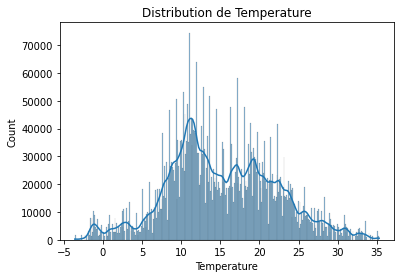

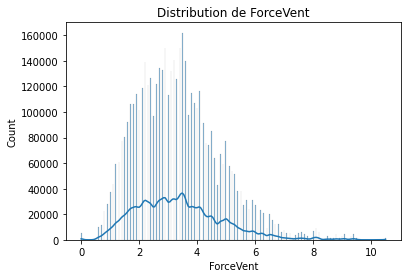

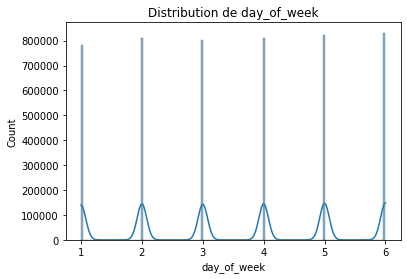

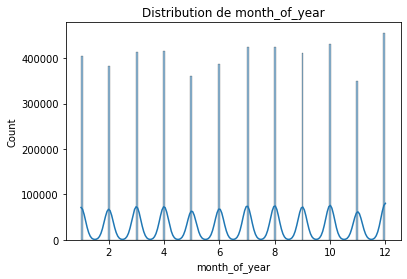

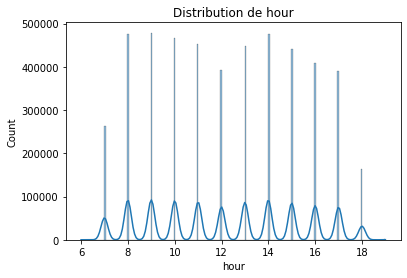

In [44]:
%%script python -c "pass"
import matplotlib.pyplot as plt
import seaborn as sns

for col in X_train.select_dtypes(include='number').columns:
    plt.figure()
    sns.histplot(X_train[col].dropna(), kde=True)
    plt.title(f'Distribution de {col}')


for col in X_train.select_dtypes(include='object').columns:
    plt.figure()
    X_train[col].value_counts().plot(kind='bar')
    plt.title(f'Valeurs de {col}')


# Random Forest Regression model with default parameters

In [8]:
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from sklearn.metrics import make_scorer

rfc = RandomForestRegressor(
    n_estimators=10, 
    n_jobs=-1,
    # min_samples_leaf=0.05,
    random_state=42)

features = [
    'Precipitations', 'HauteurNeige', 'Temperature', 'ForceVent',
    'hour', 'day_of_week', 'month_of_year', 'geo_cluster',
]

rfc.fit(X_train[features], y_train['invalid_ratio'], sample_weight=X_train["total_count"])


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

In [9]:
y_pred = rfc.predict(X_test[features])

# Définir un scorer basé sur spearmanr
def spearman_scorer(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation  # retourne juste le coef

# Le transformer en scorer utilisable par scikit-learn
spearman_score = make_scorer(spearman_scorer, greater_is_better=True)
scores = cross_val_score(rfc, X_train[features], y_train['invalid_ratio'], cv=5, scoring=spearman_score)

print("Score Spearman moyen (CV) :", scores.mean())

Score Spearman moyen (CV) : 0.15948709624360774


In [10]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train[features].columns).sort_values(ascending=False)
feature_scores

geo_cluster       0.392800
month_of_year     0.301533
hour              0.102422
Temperature       0.084756
ForceVent         0.068545
day_of_week       0.041075
Precipitations    0.008794
HauteurNeige      0.000075
dtype: float64

# Feature engineering

There is no need to split between training and test set, as files are already provided by the data provider.

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

In [23]:
# We transform hours and days of the week into cyclical features
# We can use sine and cosine transformations to represent cyclical features. 
# This is especially useful for time-related features like hours of the day or days of the week.
X_train["hour_sin"] = np.sin(2 * np.pi * X_train["hour"] / 24)
X_train["hour_cos"] = np.cos(2 * np.pi * X_train["hour"] / 24)

# We can also create a feature to indicate if the day is a weekend or not.
# In this case, we will consider Saturday and Sunday as weekends (days 5 and 6).
X_train["is_weekend"] = (X_train["day_of_week"] >= 5).astype(int)

X_test["hour_sin"] = np.sin(2 * np.pi * X_test["hour"] / 24)
X_test["hour_cos"] = np.cos(2 * np.pi * X_test["hour"] / 24)
X_test["is_weekend"] = (X_test["day_of_week"] >= 5).astype(int)

In [24]:
features_timechanged = [
    'Precipitations', 'HauteurNeige', 'Temperature', 'ForceVent',
    'hour_sin', 'hour_cos', 'is_weekend', 'geo_cluster'
]
rfc_time = RandomForestRegressor(
    n_estimators=10, 
    n_jobs=-1,
    random_state=42)

rfc_time.fit(X_train[features_timechanged], y_train['invalid_ratio'], sample_weight=X_train["total_count"])

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

In [25]:
y_pred_time = rfc_time.predict(X_test[features_timechanged])

# Définir un scorer basé sur spearmanr
def spearman_scorer(y_true, y_pred_time):
    return spearmanr(y_true, y_pred_time).correlation  # retourne juste le coef
# Le transformer en scorer utilisable par scikit-learn
spearman_score_time = make_scorer(spearman_scorer, greater_is_better=True)
scores = cross_val_score(rfc_time, X_train[features_timechanged], y_train['invalid_ratio'], cv=5, scoring=spearman_score_time)

print("Score Spearman moyen (CV) :", scores.mean())

Score Spearman moyen (CV) : 0.15950318084050938


In [26]:
# view the feature scores
feature_scores = pd.Series(rfc_time.feature_importances_, index=X_train[features_timechanged].columns).sort_values(ascending=False)
feature_scores

geo_cluster       0.395571
Temperature       0.261661
ForceVent         0.184036
hour_cos          0.056783
hour_sin          0.053258
Precipitations    0.024989
is_weekend        0.023608
HauteurNeige      0.000093
dtype: float64

In [34]:
features_timechanged = [
    'Temperature', 'ForceVent', 'day_of_week',
    'hour', 'month_of_year', 'geo_cluster',
]

rfc_time_opti = RandomForestRegressor(
    n_estimators=10, 
    n_jobs=-1,
    random_state=42)

rfc_time_opti.fit(X_train[features_timechanged], y_train['invalid_ratio'], sample_weight=X_train["total_count"])

y_pred_time = rfc_time_opti.predict(X_test[features_timechanged])

# Définir un scorer basé sur spearmanr
def spearman_scorer(y_true, y_pred_time):
    return spearmanr(y_true, y_pred_time).correlation  # retourne juste le coef
# Le transformer en scorer utilisable par scikit-learn
spearman_score_time = make_scorer(spearman_scorer, greater_is_better=True)
scores = cross_val_score(rfc_time_opti, X_train[features_timechanged], y_train['invalid_ratio'], cv=5, scoring=spearman_score_time)

print("Score Spearman moyen (CV) :", scores.mean())

Score Spearman moyen (CV) : 0.15980075100256136


In [35]:
# view the feature scores
feature_scores = pd.Series(rfc_time_opti.feature_importances_, index=X_train[features_timechanged].columns).sort_values(ascending=False)
feature_scores

geo_cluster      0.394204
month_of_year    0.301781
hour             0.103069
Temperature      0.086953
ForceVent        0.072850
day_of_week      0.041143
dtype: float64

# XGBooster

In [52]:
X_train.columns

Index(['total_count', 'longitude_scaled', 'latitude_scaled', 'Precipitations',
       'HauteurNeige', 'Temperature', 'ForceVent', 'day_of_week',
       'month_of_year', 'hour', 'geo_cluster', 'hour_sin', 'hour_cos',
       'is_weekend'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from scipy.stats import spearmanr

features = [
    'longitude_scaled', 'latitude_scaled', 'Precipitations', 'HauteurNeige', 'Temperature', 'ForceVent',
    'hour', 'day_of_week', 'month_of_year', #'geo_cluster',
]

def spearman_scorer(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation

spearman_score = make_scorer(spearman_scorer, greater_is_better=True)
# 2. Modèle avec toutes les variables
model_all = XGBRegressor(n_estimators=10, random_state=42, n_jobs=-1)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

score_all = cross_validate(model_all, X_train[features], y_train['invalid_ratio'], cv=cv, scoring=spearman_score, fit_params={"sample_weight": X_train["total_count"]})
print(f"Score avec toutes les variables : {np.mean(score_all['test_score']):.4f}")



Score avec toutes les variables : 0.2549


In [ ]:
model = XGBRegressor(n_estimators=10, random_state=42, n_jobs=-1)
model.fit(X_train, y_train['invalid_ratio'], sample_weight=X_train["total_count"])
# model.fit(X_train[features].drop(columns=["ForceVent", "Temperature", "Precipitations"]), y_train['invalid_ratio'], sample_weight=X_train["total_count"])
importances = model.get_booster().get_score(importance_type='gain')
df_importance = pd.DataFrame.from_dict(importances, orient='index', columns=['importance'])
df_importance = df_importance.sort_values(by='importance', ascending=False)
print(df_importance)

                    importance
total_count       10921.131836
geo_cluster        4210.568359
month_of_year      2737.753418
longitude_scaled   1735.544922
latitude_scaled    1020.937927
hour                826.114319
hour_sin            732.281860
hour_cos            460.134003
day_of_week         347.225891
Temperature         139.614380
Precipitations       16.675457


In [65]:
# 3. Modèle sans 'forcevent'
# X_reduced = X_train[features].drop(columns=["ForceVent", "Temperature", "Precipitations"])
X_reduced = X_train[features].drop(columns=["ForceVent", "Temperature", "Precipitations"])

model_reduced = XGBRegressor(n_estimators=10, random_state=42, n_jobs=-1)
score_reduced = cross_validate(model_reduced, X=X_train, y=y_train['invalid_ratio'], cv=cv, scoring=spearman_score, fit_params={"sample_weight": X_train["total_count"]})
print(f"Score sans 'forcevent' : {np.mean(score_reduced['test_score']):.4f}")

Score sans 'forcevent' : 0.3723


In [ ]:
X_train.corr()

,total_count,longitude_scaled,latitude_scaled,Precipitations,HauteurNeige,Temperature,ForceVent,day_of_week,month_of_year,hour,geo_cluster,hour_sin,hour_cos,is_weekend
total_count,1.000000,-0.019611,-0.011878,0.000427,-0.003010,-0.026883,0.003529,0.006625,0.001128,-0.006716,-0.057286,0.007653,-0.008520,0.005265
longitude_scaled,-0.019611,1.000000,0.284682,0.000454,0.010791,-0.002963,0.000121,-0.000581,0.001676,-0.004035,0.348984,0.002611,0.004686,0.000572
latitude_scaled,-0.011878,0.284682,1.000000,-0.000440,0.002890,0.000944,-0.001315,-0.000634,-0.000972,-0.001160,0.024289,0.000605,0.002034,-0.000046
Precipitations,0.000427,0.000454,-0.000440,1.000000,0.002047,-0.069385,0.065190,0.031318,0.007146,0.014059,0.001344,-0.014289,0.017619,0.011783
HauteurNeige,-0.003010,0.010791,0.002890,0.002047,1.000000,-0.107175,-0.001666,-0.040603,-0.005194,-0.050681,0.006560,0.033294,0.021107,-0.032628
Temperature,-0.026883,-0.002963,0.000944,-0.069385,-0.107175,1.000000,-0.141398,0.000348,-0.307829,0.080842,-0.003402,-0.100307,-0.111636,-0.001431
ForceVent,0.003529,0.000121,-0.001315,0.065190,-0.001666,-0.141398,1.000000,0.004501,0.063406,0.133023,-0.001351,-0.133909,-0.094710,0.009797
day_of_week,0.006625,-0.000581,-0.000634,0.031318,-0.040603,0.000348,0.004501,1.000000,0.002906,-0.006046,-0.001918,0.007310,0.000254,0.830094
month_of_year,0.001128,0.001676,-0.000972,0.007146,-0.005194,-0.307829,0.063406,0.002906,1.000000,0.023448,0.004217,-0.018964,0.001115,-0.000585
hour,-0.006716,-0.004035,-0.001160,0.014059,-0.050681,0.080842,0.133023,-0.006046,0.023448,1.000000,-0.017927,-0.991842,0.204201,-0.007687
